## HarmonyDB Project By Dor Amrami

Visualisations On 11 Views Made In SQL 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.ticker import FuncFormatter

In [28]:
view1 = pd.read_excel('VIEWS.xlsx', 'Album_Copies_Sales_By_Country')

view2 = pd.read_excel('VIEWS.xlsx', 'Albums_Sold_Per_Band')

view3 = pd.read_excel('VIEWS.xlsx', 'Avg_Attendance_Per_Band')

view4 = pd.read_excel('VIEWS.xlsx', 'Avg_Ticket_Price_By_Band')

view5 = pd.read_excel('VIEWS.xlsx', 'Band_Total_Revenue')

view6 = pd.read_excel('VIEWS.xlsx', 'Bands_Founded_By_Decade')

view7 = pd.read_excel('VIEWS.xlsx', 'Concert_Attendance')

view8 = pd.read_excel('VIEWS.xlsx', 'Concert_Count_By_Day_Of_Week')

view9 = pd.read_excel('VIEWS.xlsx', 'Copies_sold_per_album')

view10 = pd.read_excel('VIEWS.xlsx', 'Top_Profit_Location')

view11 = pd.read_excel('VIEWS.xlsx', 'Location_Capacity')

---

---

In [3]:
sb.set_theme()

#### VIEW 1

## How Many Album Copies Sold By Country

9 Not Null Entries

In [4]:
view1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            9 non-null      object
 1   Total_Copies_Sold  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


Min =  1.6 Milion

Max =  407 Milion

Avg = 9.8 Milion

In [5]:
view1.describe()

,Total_Copies_Sold
count,9.000000e+00
mean,9.849611e+07
std,1.747614e+08
min,1.665000e+06
25%,4.750000e+06
50%,1.135000e+07
75%,3.040000e+07
max,4.075000e+08


In [6]:
# sort the values in ascending order
view1 = view1.sort_values(by='Total_Copies_Sold', ascending=True)
view1

,Country,Total_Copies_Sold
4,ISRAEL,1665000
6,JAPAN,2780000
5,ITALY,4750000
1,FINLAND,6120000
2,FRANCE,11350000
3,GERMANY,16700000
0,CANADA,30400000
8,USA,405200000
7,UK,407500000


C:\Users\Dor\AppData\Local\Temp\ipykernel_356\3061984535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sb.barplot(data=view1, x="Country", y="Total_Copies_Sold", estimator='sum', palette=colors)


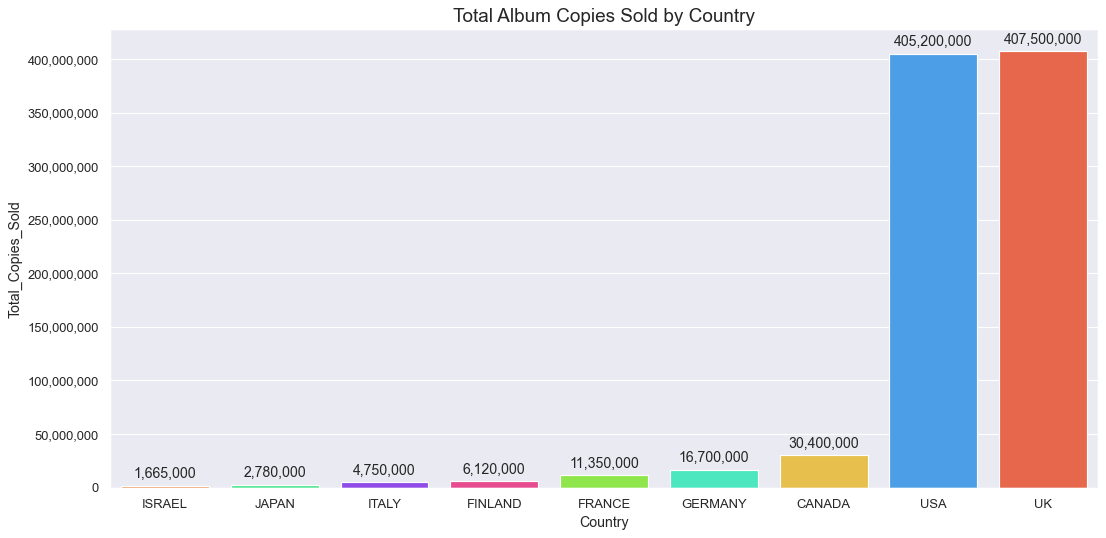

In [7]:
colors = ["#FF8C33", "#33FF8C", "#8C33FF", "#FF338C", "#8CFF33", "#33FFCC", "#FFCC33", "#33A1FF", "#FF5733"] # colors for the bars


# Create the bar plot
plt.figure(figsize=(15, 7), dpi=85)
bar = sb.barplot(data=view1, x="Country", y="Total_Copies_Sold", estimator='sum', palette=colors)
plt.title('Total Album Copies Sold by Country', fontsize=16)

# Change the format of the y-axis to 'plain' to display the full numbers
plt.ticklabel_format(style='plain', axis='y')

# Define a function to format the y-axis numbers with commas
def comma_formatter(x, pos):
    return f'{int(x):,}'

# Apply the comma formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the bars
for num in bar.patches:
    value = int(num.get_height())
    bar.annotate(f'{value:,}', (num.get_x() + num.get_width() / 2., num.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

---

#### VIEW 2

## How Many Album Copies Sold By Band

50 Not Null Entries

In [8]:
view2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Band_Name    50 non-null     object
 1   Country      50 non-null     object
 2   Albums_Sold  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


Min = 110K

Max = 105 Milion

Avg = 17.7 Milion

In [9]:
view2.describe()

,Albums_Sold
count,5.000000e+01
mean,1.772930e+07
std,2.471584e+07
min,1.100000e+05
25%,1.062500e+06
50%,4.500000e+06
75%,2.527500e+07
max,1.050000e+08


Sort the values in ascending order for better readability

In [10]:
view2 = view2.sort_values(by='Albums_Sold', ascending=True)
view2

,Band_Name,Country,Albums_Sold
16,Doctor Casper Bunny Show,ISRAEL,110000
20,Mercedes Band,ISRAEL,150000
21,Sinergiya,ISRAEL,180000
18,Hazeevot‎,ISRAEL,180000
17,Hayehudim,ISRAEL,265000
26,SiM,JAPAN,280000
19,Machina,ISRAEL,370000
15,caveret,ISRAEL,410000
6,Sonata Arctica,FINLAND,570000
8,Gojira,FRANCE,750000


### Since i have 50 bands, i will make seperate graphs for each country 

In [11]:
# All the countries containing different bands
israel_bands = view2.query("Country == 'ISRAEL'")
japan_bands = view2.query("Country == 'JAPAN'")
finland_bands = view2.query("Country == 'FINLAND'")
german_bands = view2.query("Country == 'GERMANY'")
uk_bands = view2.query("Country == 'UK'")
usa_bands = view2.query("Country == 'USA'")
france_bands = view2.query("Country == 'FRANCE'")
canada_bands = view2.query("Country == 'CANADA'")
italy_bands = view2.query("Country == 'ITALY'")

### Israeli Bands

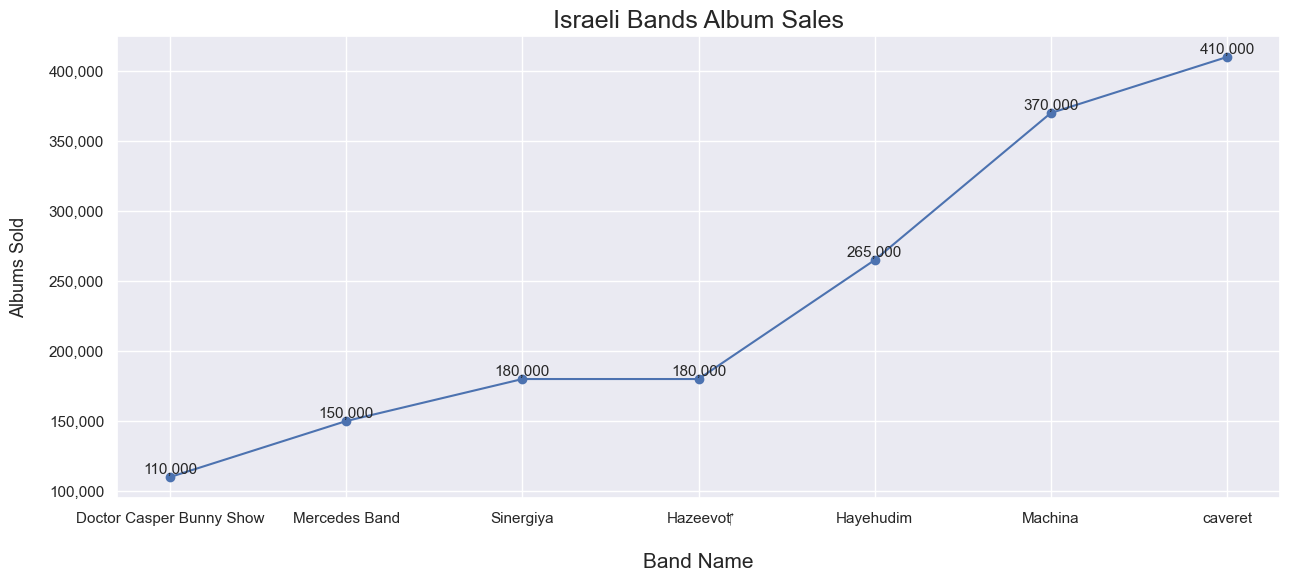

In [12]:
israel_bands = view2.query("Country == 'ISRAEL'")

# Plotting
plt.figure(figsize=(15,6), dpi=100)
plt.title("Israeli Bands Album Sales", fontsize=18)
x = israel_bands['Band_Name'].tolist()
y = israel_bands['Albums_Sold'].tolist()

plt.plot(x, y, marker='o', color='b')

plt.xlabel("Band Name", fontsize=15, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)

# Formatter function
def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the markers
for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11)


plt.show()

### Japanese bands

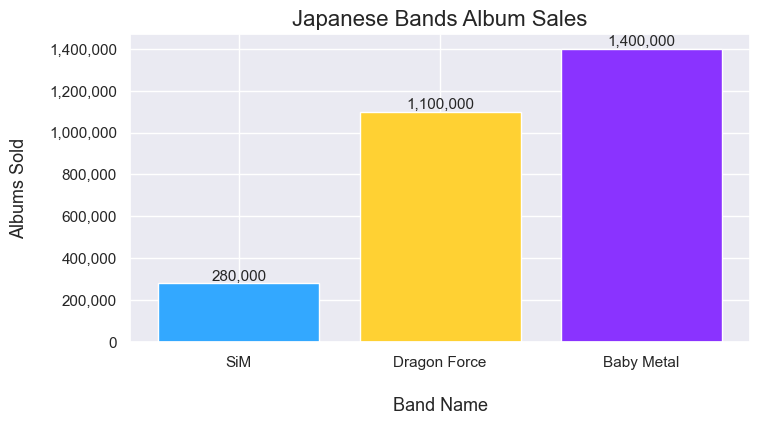

In [13]:
japan_bands = view2.query("Country == 'JAPAN'")

plt.figure(figsize=(8,4))
plt.title("Japanese Bands Album Sales", fontsize=16)
x = japan_bands['Band_Name'].tolist()
y = japan_bands['Albums_Sold'].tolist()

colors = ['#33A8FF', '#FFD133', '#8A33FF'] 

plt.bar(x, y, color=colors)

plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)

# Formatter function
def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the markers
for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11)


plt.show()

### Finnish Bands

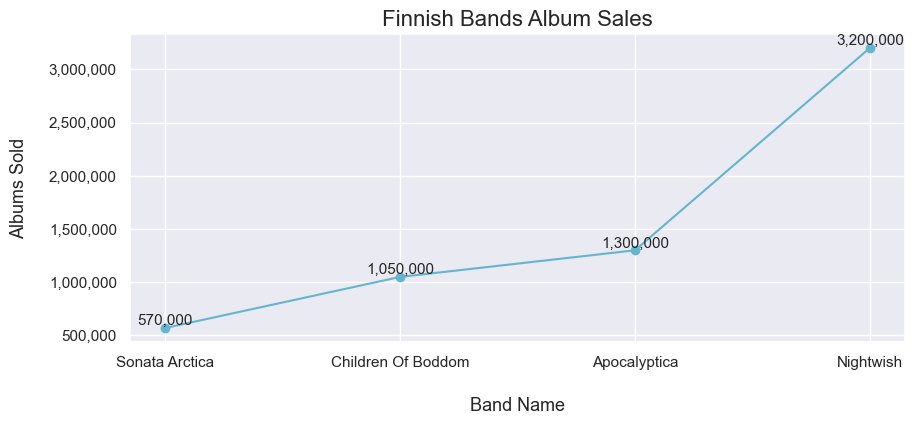

In [14]:
finland_bands = view2.query("Country == 'FINLAND'")


plt.figure(figsize=(10,4))
plt.title("Finnish Bands Album Sales", fontsize=16)
x = finland_bands['Band_Name'].tolist()
y = finland_bands['Albums_Sold'].tolist()

plt.plot(x, y, marker='o', color='c')

plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)

# Formatter function
def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the markers
for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11)


plt.show()

### German Bands

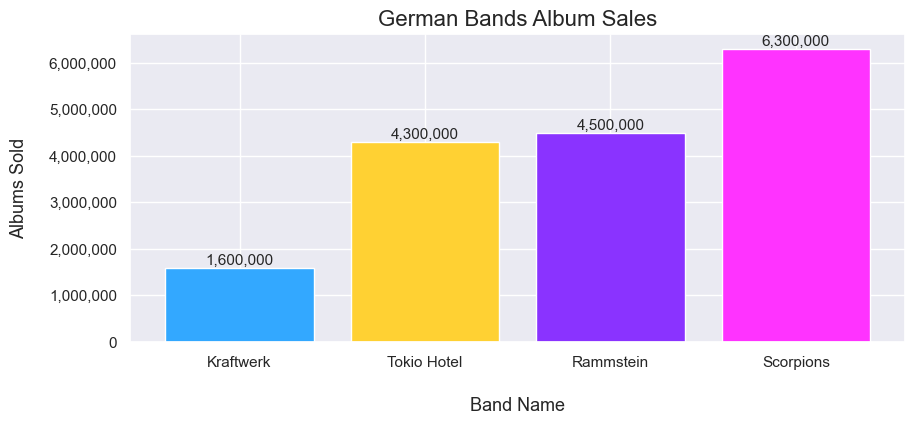

In [15]:
german_bands = view2.query("Country == 'GERMANY'")

plt.figure(figsize=(10,4))
plt.title("German Bands Album Sales", fontsize=16)
x = german_bands['Band_Name'].tolist()
y = german_bands['Albums_Sold'].tolist()

colors = ['#33A8FF', '#FFD133', '#8A33FF', '#FF33FF'] # bar colors

plt.bar(x, y,  color=colors)

plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)


def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))


for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11)


plt.show()

### UK Bands

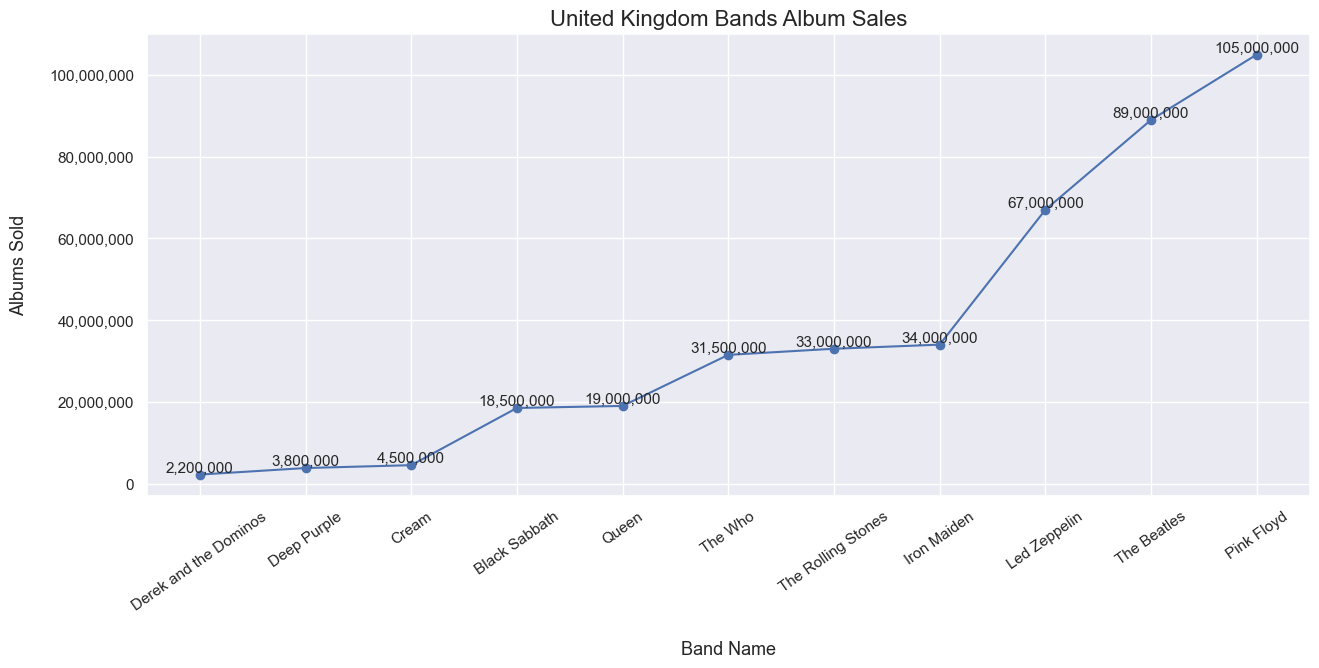

In [16]:
uk_bands = view2.query("Country == 'UK'")

plt.figure(figsize=(15,6), dpi=100)
plt.title("United Kingdom Bands Album Sales", fontsize=16)
x = uk_bands['Band_Name'].tolist()
y = uk_bands['Albums_Sold'].tolist()

plt.plot(x, y, marker='o', color='b')

plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)


def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))


for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=35)
plt.show()

### American Bands

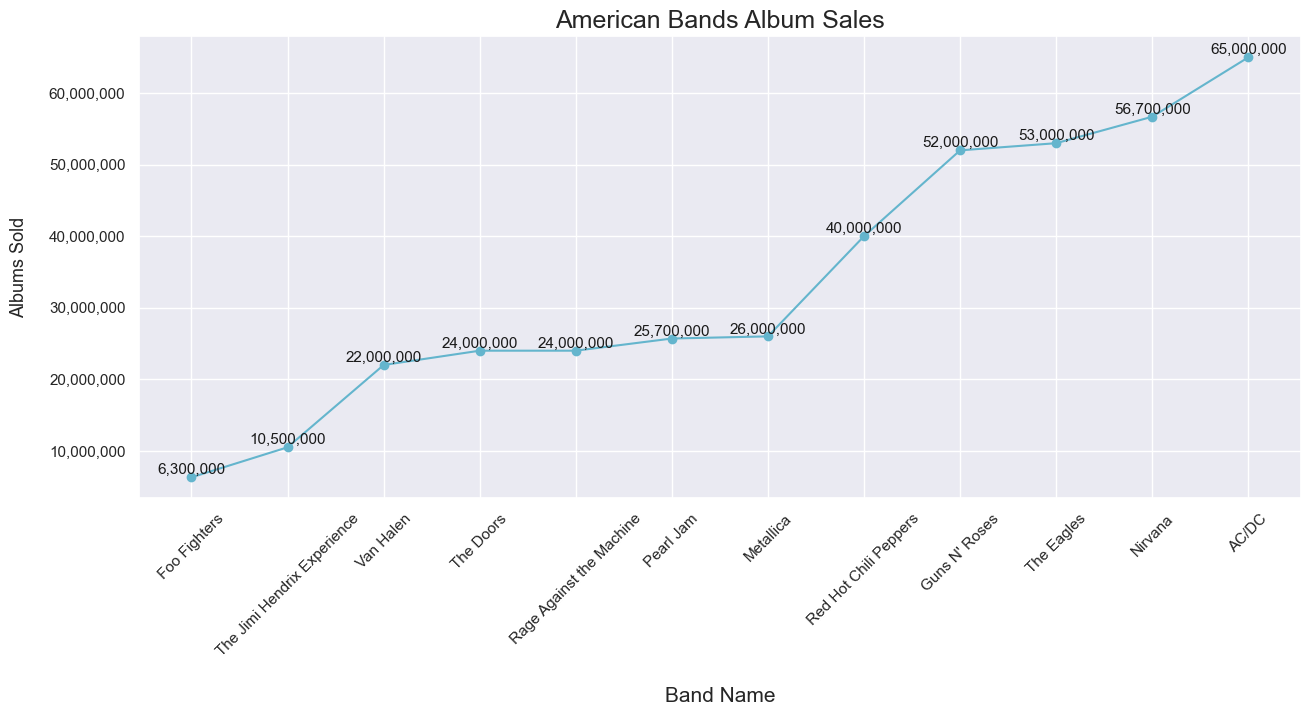

In [17]:
usa_bands = view2.query("Country == 'USA'")

plt.figure(figsize=(15,6), dpi=100)
plt.title("American Bands Album Sales", fontsize=18)
x = usa_bands['Band_Name'].tolist()
y = usa_bands['Albums_Sold'].tolist()

plt.plot(x, y, marker='o', color='c')

plt.xlabel("Band Name", fontsize=15, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)


def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))


for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11, color= 'k')

plt.xticks(rotation=45)
plt.show()

### French Bands

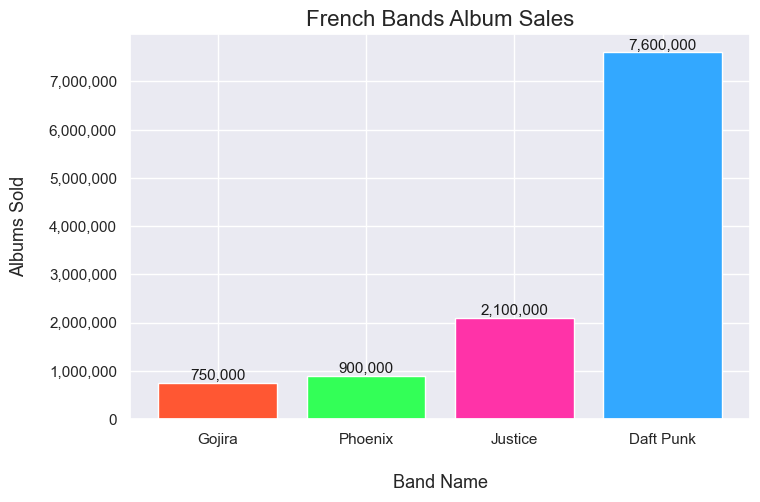

In [18]:
france_bands = view2.query("Country == 'FRANCE'")


plt.figure(figsize=(8,5))
plt.title("French Bands Album Sales", fontsize=16)
x = france_bands['Band_Name'].tolist()
y = france_bands['Albums_Sold'].tolist()

colors = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF']

plt.bar(x, y, color=colors)

plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)

def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11, color= 'k')

plt.show()

### Canadian Bands

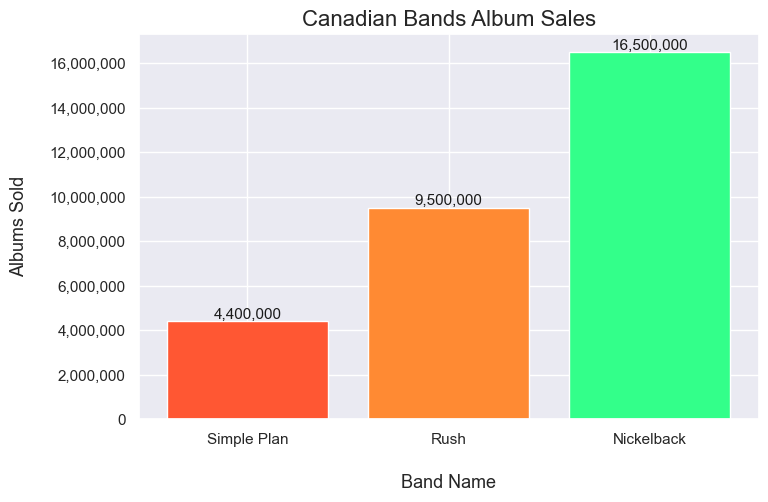

In [19]:
canada_bands = view2.query("Country == 'CANADA'")

plt.figure(figsize=(8,5))
plt.title("Canadian Bands Album Sales", fontsize=16)
x = canada_bands['Band_Name'].tolist()
y = canada_bands['Albums_Sold'].tolist()

colors = ['#FF5733', '#FF8A33', '#33FF8A']

plt.bar(x, y, color=colors)

plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)

def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11, color= 'k')

plt.show()

### Italian Bands

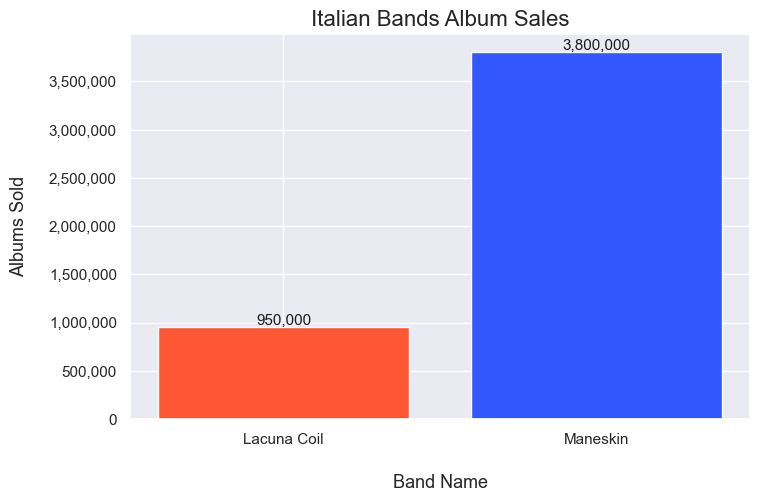

In [20]:
italy_bands = view2.query("Country == 'ITALY'")

plt.figure(figsize=(8,5))
plt.title("Italian Bands Album Sales", fontsize=16)
x = italy_bands['Band_Name'].tolist()
y = italy_bands['Albums_Sold'].tolist()


colors = ['#FF5733', '#3357FF']

plt.bar(x, y, color=colors)


plt.xlabel("Band Name", fontsize=13, labelpad=20)
plt.ylabel("Albums Sold", fontsize=13, labelpad=15)

def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

for i, value in enumerate(y):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11, color='k')


plt.show()


### Top Band In Each Country By Album Sales


Israel:

     Caveret 410,000 Albums

Japan:

     Baby Metal 1,400,000 Albums

Finland:

     Nightwish 3,200,000 Albums

Germany:

     Scorpions 6,300,000 Albums

UK:

     Pink Floyd 105,000,000 Albums

US:

     AC/DC 65,000,000 Albums

France:

     Daftpunk 7,600,000 Albums

Canada:

     Nickelback 16,500,000 Albums
     
Italy:

     Maneskin 3,800,000 Albums


---

#### View 3

## Average Concert Attendance Per Band

50 Not Null Entries

In [29]:
view3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Band_Name       50 non-null     object
 1   Avg_Attendance  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


The Avg Concert Attendance is around 29K 

Minimum Concert Attendance is around 4k

Maximum Concert Attendance is around 87k

In [30]:
view3.describe()

,Avg_Attendance
count,50.000000
mean,29164.200000
std,22298.070607
min,4177.000000
25%,13859.000000
50%,18474.500000
75%,46874.500000
max,86523.000000


In [31]:
view3.head(5)

,Band_Name,Avg_Attendance
0,The Jimi Hendrix Experience,16841
1,Guns N' Roses,52000
2,Nirvana,47166
3,Red Hot Chili Peppers,86523
4,Foo Fighters,8874


sort the values by avg attendance in ascending order to extract the most interesting values

I took TOP 10 bands by attendance

In [32]:
view3 = view3.sort_values(by='Avg_Attendance', ascending=True).tail(10)
view3

,Band_Name,Avg_Attendance
1,Guns N' Roses,52000
44,Daft Punk,56166
45,Gojira,58250
38,Sonata Arctica,58625
35,Doctor Casper Bunny Show,60709
36,Nightwish,65684
16,Rush,72331
17,Simple Plan,79867
47,Justice,80788
3,Red Hot Chili Peppers,86523


C:\Users\Dor\AppData\Local\Temp\ipykernel_356\998168630.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sb.barplot(data=view3, x='Band_Name', y='Avg_Attendance', palette=colors)


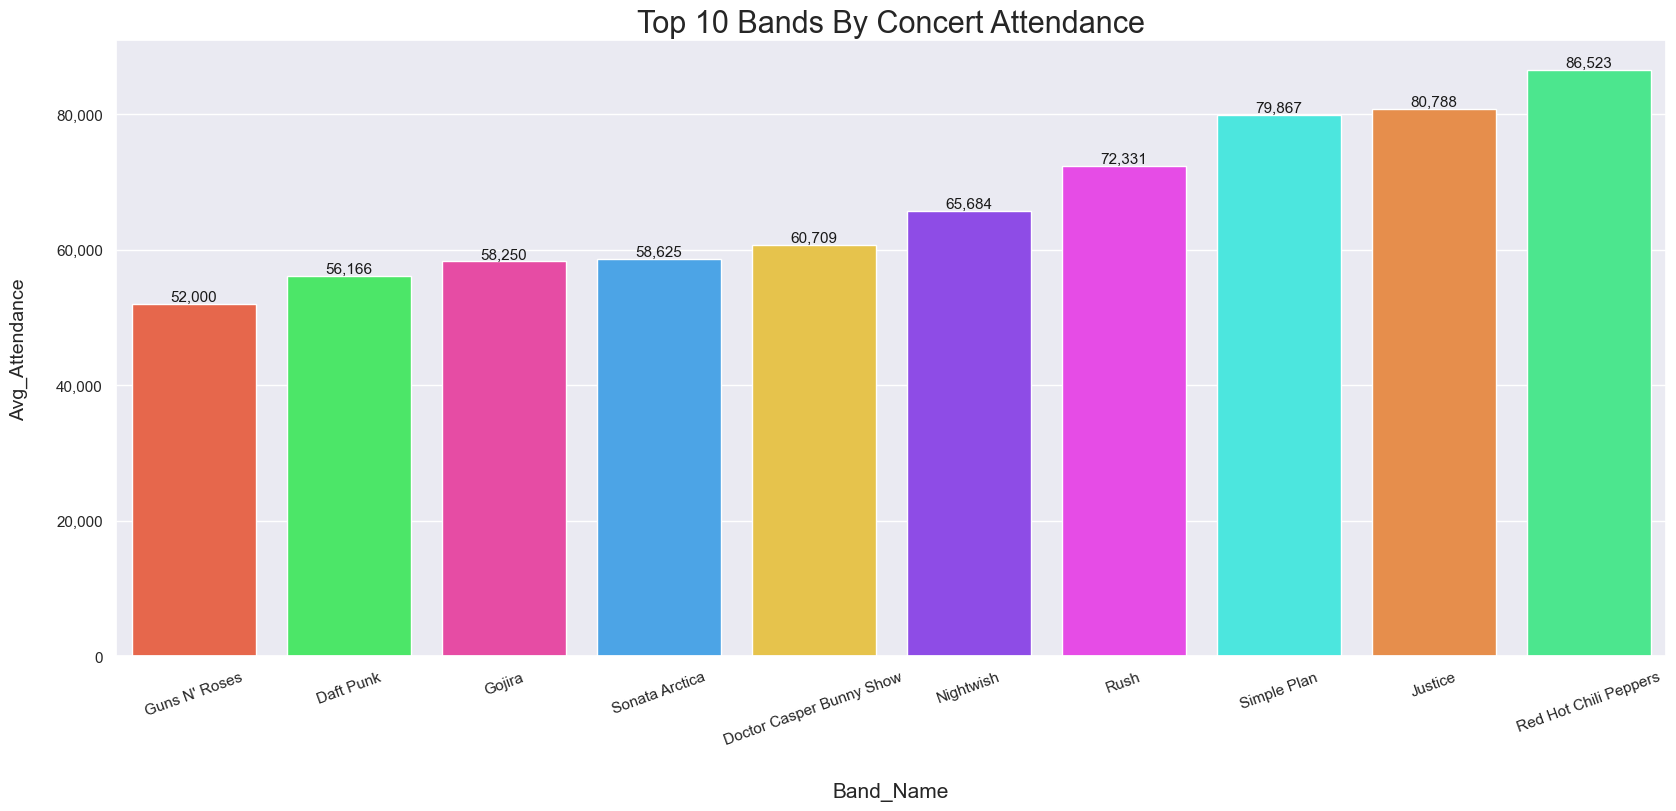

In [34]:
# Colors list
colors = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF', '#FFD133', '#8A33FF', '#FF33FF', '#33FFF5', '#FF8A33', '#33FF8A']

# Plot setup
plt.figure(figsize=(20,8), dpi=100)
plt.title("Top 10 Bands By Concert Attendance", fontsize=22)

# Bar plot
bar = sb.barplot(data=view3, x='Band_Name', y='Avg_Attendance', palette=colors)

# Labels
plt.xlabel("Band_Name", fontsize=15, labelpad=25)
plt.ylabel("Avg_Attendance", fontsize=14, labelpad=20)


# Formatter for y-axis
def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))


# Annotate bars
for p in bar.patches:
    height = p.get_height()
    bar.annotate(f'{int(height):,}', 
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=11, color='k')


# Rotate x-ticks
plt.xticks(rotation=20)
plt.show()

### Red Hot Chili Peppers Has The Highest Concert Attendance With An Average Of 86k People

---

#### View 4

## Average Concert Ticket Price By Band

50 Not Null Entries

In [35]:
view4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Band_Name         50 non-null     object 
 1   Avg_Ticket_Price  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes


Minimum Ticket Price = 23.7$

Maximum Ticket Price = 64.2$

Average Ticket Price = 45.5$

In [36]:
view4.describe()

,Avg_Ticket_Price
count,50.000000
mean,45.469166
std,9.583273
min,23.766700
25%,41.957150
50%,46.121800
75%,51.815325
max,64.230300


sort the Ticket prices in ascending order

In [37]:
view4 = view4.sort_values(by='Avg_Ticket_Price', ascending=True)
view4.head(10)

,Band_Name,Avg_Ticket_Price
20,Led Zeppelin,23.7667
3,Red Hot Chili Peppers,25.0336
13,Dragon Force,25.9723
36,Nightwish,29.7403
2,Nirvana,30.5386
14,SiM,31.1118
16,Rush,31.1644
12,Baby Metal,32.7352
43,Kraftwerk,32.9212
29,Hazeevot‎,40.2187


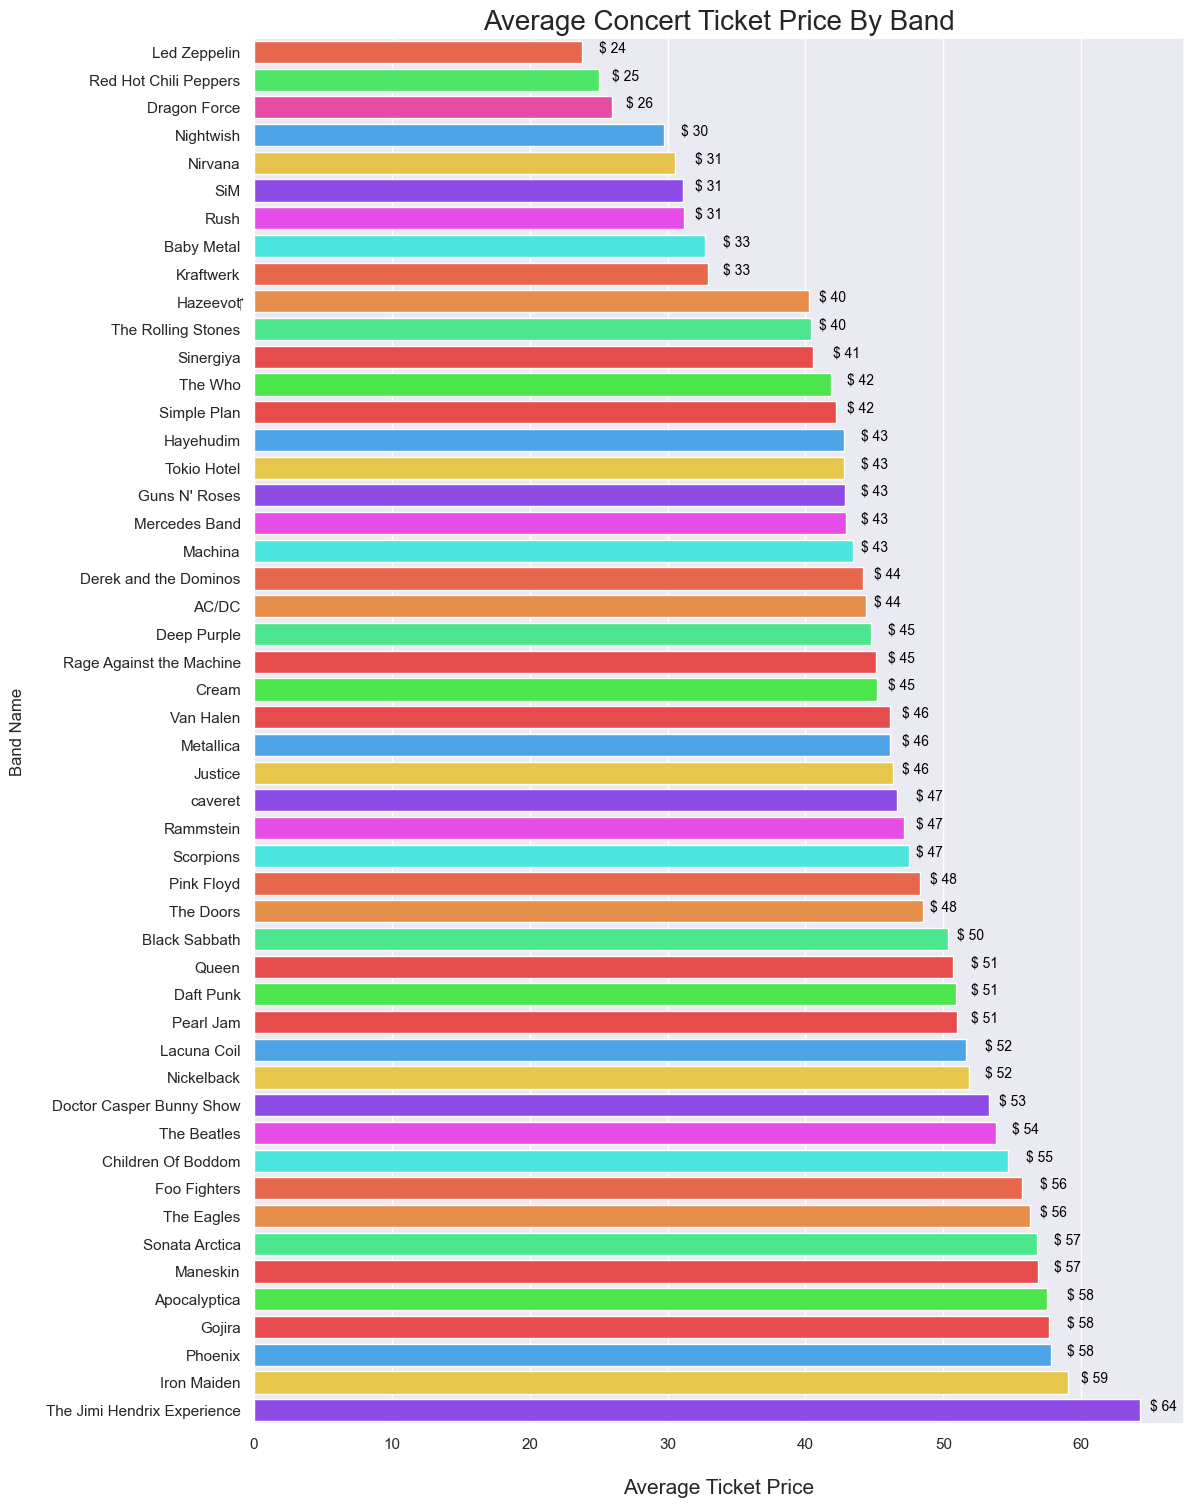

In [38]:
# vibrant color pallete for the bars
colors = [
    '#FF5733', '#33FF57', '#FF33A8', '#33A8FF', '#FFD133', '#8A33FF', '#FF33FF', '#33FFF5', '#FF5733', '#FF8A33',
    '#33FF8A', '#FF3333', '#33FF33', '#FF3333', '#33A8FF', '#FFD633', '#8A33FF', '#FF33FF', '#33FFF5', '#FF5733',
    '#FF8A33', '#33FF8A', '#FF3333', '#33FF33', '#FF3333', '#33A8FF', '#FFD633', '#8A33FF', '#FF33FF', '#33FFF5',
    '#FF5733', '#FF8A33', '#33FF8A', '#FF3333', '#33FF33', '#FF3333', '#33A8FF', '#FFD633', '#8A33FF', '#FF33FF',
    '#33FFF5', '#FF5733', '#FF8A33', '#33FF8A', '#FF3333', '#33FF33', '#FF3333', '#33A8FF', '#FFD633', '#8A33FF']


plt.figure(figsize=(12, 18), dpi=100)
bar_plot = sb.barplot(data=view4, y='Band_Name', x='Avg_Ticket_Price', palette=colors, hue='Band_Name')
plt.title('Average Concert Ticket Price By Band', fontsize=20)
plt.xlabel('Average Ticket Price', labelpad=20, fontsize=15)
plt.ylabel('Band Name', labelpad=15)


# Add the rounded numbers with a dollar sign on the bars
for index, value in enumerate(view4['Avg_Ticket_Price']):
    rounded_value = round(value) # Round the ticket prices
    bar_plot.text(rounded_value+1, index, f'$ {rounded_value:,}', color='black', ha="left", fontsize=10) # adding dollar sign to the rounded prices


plt.legend([],[], frameon=False) # Remove the legend because it doesn't add significant value
plt.show()

### We can see that The Ticket Prices For Jimi Hendrix Concerts Were The Most Expensive (64$ In Average)

----

#### VIEW 5

## Band Total Revenue

50 Not Null Entries

In [39]:
view5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Band_Name           50 non-null     object
 1   Concerts_Profit     50 non-null     int64 
 2   Album_Sales_Profit  50 non-null     int64 
 3   Total_Revenue       50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [40]:
view5.describe()

,Concerts_Profit,Album_Sales_Profit,Total_Revenue
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.140894e+07,8.116280e+07,1.025717e+08
std,1.497883e+07,1.118371e+08,1.118676e+08
min,2.221620e+06,4.400000e+05,4.921620e+06
25%,1.100047e+07,4.350000e+06,2.282602e+07
50%,1.669799e+07,2.045000e+07,5.240803e+07
75%,2.825508e+07,1.245000e+08,1.368862e+08
max,6.829742e+07,4.200000e+08,4.359393e+08


Sort the values by Total revenue in ascending order

In [41]:
view5 = view5.sort_values(by='Total_Revenue', ascending=True)

In [42]:
view5.head(5)

,Band_Name,Concerts_Profit,Album_Sales_Profit,Total_Revenue
30,Phoenix,2221620,2700000,4921620
19,Kraftwerk,3261884,4800000,8061884
24,Mercedes Band,9530284,600000,10130284
40,Sinergiya,10033160,720000,10753160
16,Hazeevot‎,12334792,720000,13054792


### I am interested only in the TOP 10 most profitable bands

In [43]:
top_10_bands = view5.tail(10)

top_10_bands

,Band_Name,Concerts_Profit,Album_Sales_Profit,Total_Revenue
17,Iron Maiden,18937592,136000000,154937592
46,The Rolling Stones,11162428,165000000,176162428
35,Red Hot Chili Peppers,43673360,200000000,243673360
44,The Eagles,18733872,265000000,283733872
14,Guns N' Roses,45096504,260000000,305096504
28,Nirvana,29318860,283500000,312818860
21,Led Zeppelin,4514736,335000000,339514736
0,AC/DC,18231940,325000000,343231940
42,The Beatles,13444200,356000000,369444200
31,Pink Floyd,15939332,420000000,435939332


C:\Users\Dor\AppData\Local\Temp\ipykernel_356\1391484477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sb.barplot(data=top_10_bands, x='Band_Name', y='Total_Revenue', estimator='sum', palette=colors)


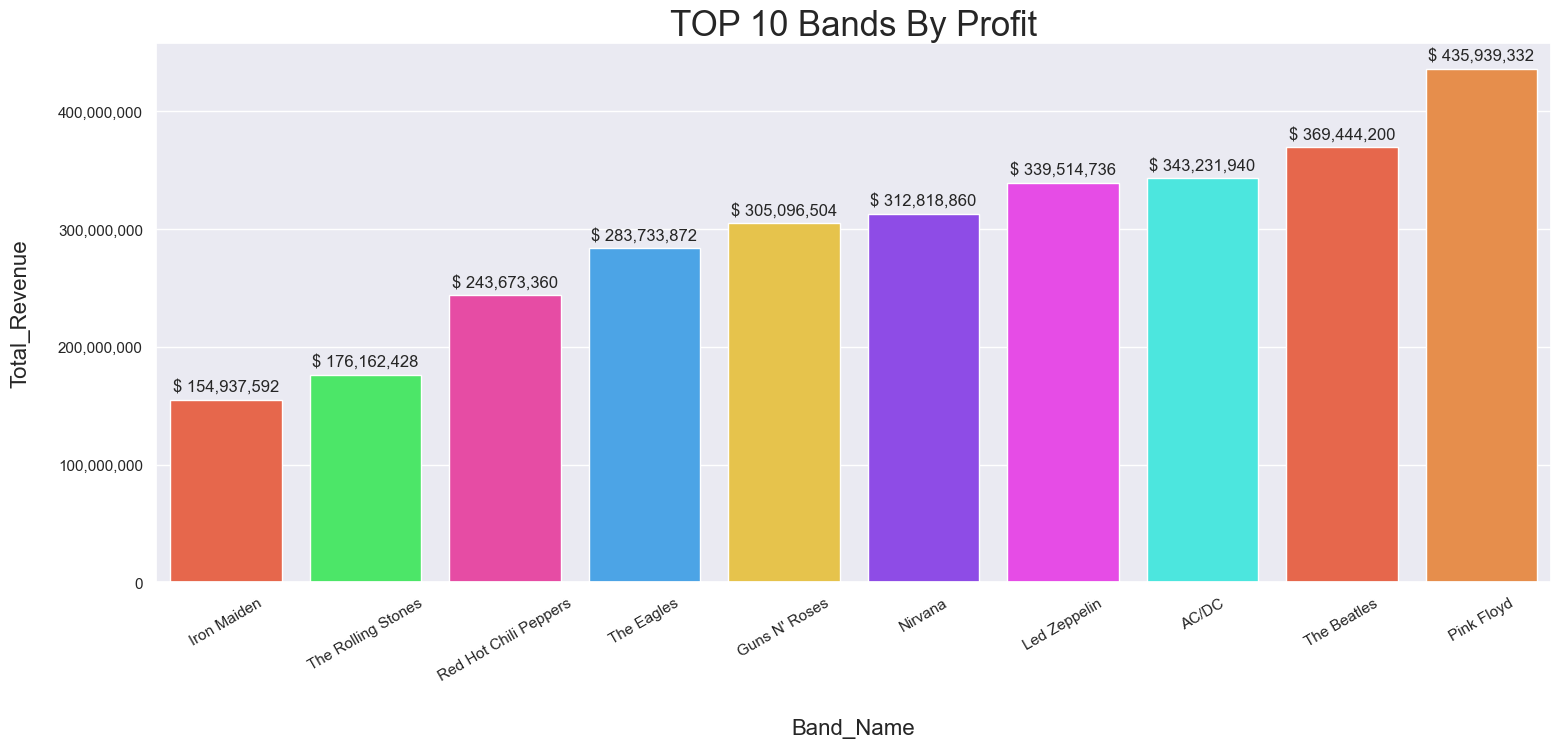

In [44]:
colors = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF', '#FFD133', '#8A33FF', '#FF33FF', '#33FFF5', '#FF5733', '#FF8A33']

plt.figure(figsize=(18,7), dpi=100)
bar = sb.barplot(data=top_10_bands, x='Band_Name', y='Total_Revenue', estimator='sum', palette=colors)
plt.title("TOP 10 Bands By Profit", fontsize=25, loc='center')

plt.xlabel('Band_Name',fontsize=16, labelpad=25)
plt.ylabel('Total_Revenue',fontsize=16, labelpad=20)


# Change the format of the y-axis to 'plain' to display the full numbers
plt.ticklabel_format(style='plain', axis='y')

# Define a function to format the y-axis numbers with commas
def comma_formatter(x, pos):
    return f'{int(x):,}'

# Apply the comma formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the bars
for num in bar.patches:
    value = int(num.get_height())
    bar.annotate(f'$ {value:,}', (num.get_x() + num.get_width() / 2., num.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.xticks(rotation=30)
plt.show()

### Pink Floyd Is The Most Profitable Band With About 436 Milion Dollars

---

#### VIEW 6

## How Many Bands Founded By Dacade

6 Not Null Entries

In [45]:
view6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Decade         6 non-null      int64
 1   Bands_Founded  6 non-null      int64
dtypes: int64(2)
memory usage: 228.0 bytes


In [46]:
view6.describe()

,Decade,Bands_Founded
count,6.000000,6.000000
mean,1985.000000,8.333333
std,18.708287,5.316641
min,1960.000000,2.000000
25%,1972.500000,4.250000
50%,1985.000000,8.500000
75%,1997.500000,11.250000
max,2010.000000,16.000000


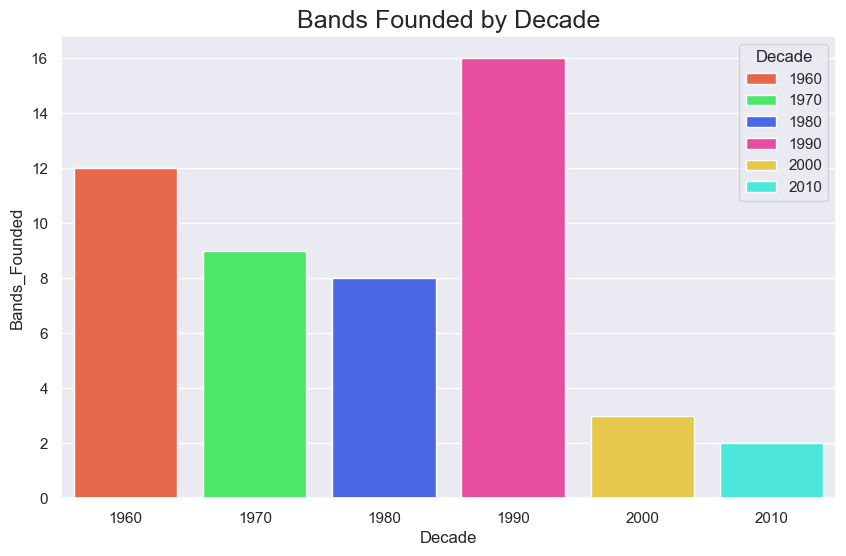

In [47]:
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FFD733", "#33FFF0"]


plt.figure(figsize=(10, 6))
sb.barplot(data=view6, x="Decade", y="Bands_Founded", hue="Decade", palette=colors)
plt.title('Bands Founded by Decade', fontsize=18)

plt.show()

### Most Bands From My Database Were Founded In The 90'

---

#### VIEW 7

## Concert Attendance

Average Concert Attendance/Absence for all concerts in the database

In [48]:
view7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Band_Name           50 non-null     object
 1   Average_Attendance  50 non-null     int64 
 2   Average_Absence     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Average Attendance: 29K

Average Absence: 710

In [49]:
view7.describe()

,Average_Attendance,Average_Absence
count,50.000000,50.000000
mean,29164.200000,710.000000
std,22298.070607,378.724767
min,4177.000000,73.000000
25%,13859.000000,416.750000
50%,18474.500000,635.500000
75%,46874.500000,1037.500000
max,86523.000000,1553.000000


## I have 50 bands but i'm intersted in the top 10 ones, attendance wise

### TOP 10 Bands By Their Concert Attendance

In [50]:
view7 = view7.sort_values(by='Average_Attendance', ascending=True)

In [51]:
view7 = view7.tail(10)
view7

,Band_Name,Average_Attendance,Average_Absence
1,Guns N' Roses,52000,999
44,Daft Punk,56166,500
45,Gojira,58250,416
38,Sonata Arctica,58625,1125
35,Doctor Casper Bunny Show,60709,1040
36,Nightwish,65684,1065
16,Rush,72331,1553
17,Simple Plan,79867,1135
47,Justice,80788,874
3,Red Hot Chili Peppers,86523,1476


I'll break down the Attendance into 2 columns:

- One for Attendance
- Other one for Absence

In [52]:
Attendance = view7[['Band_Name', 'Average_Attendance']]
Absence = view7[['Band_Name', 'Average_Absence']]

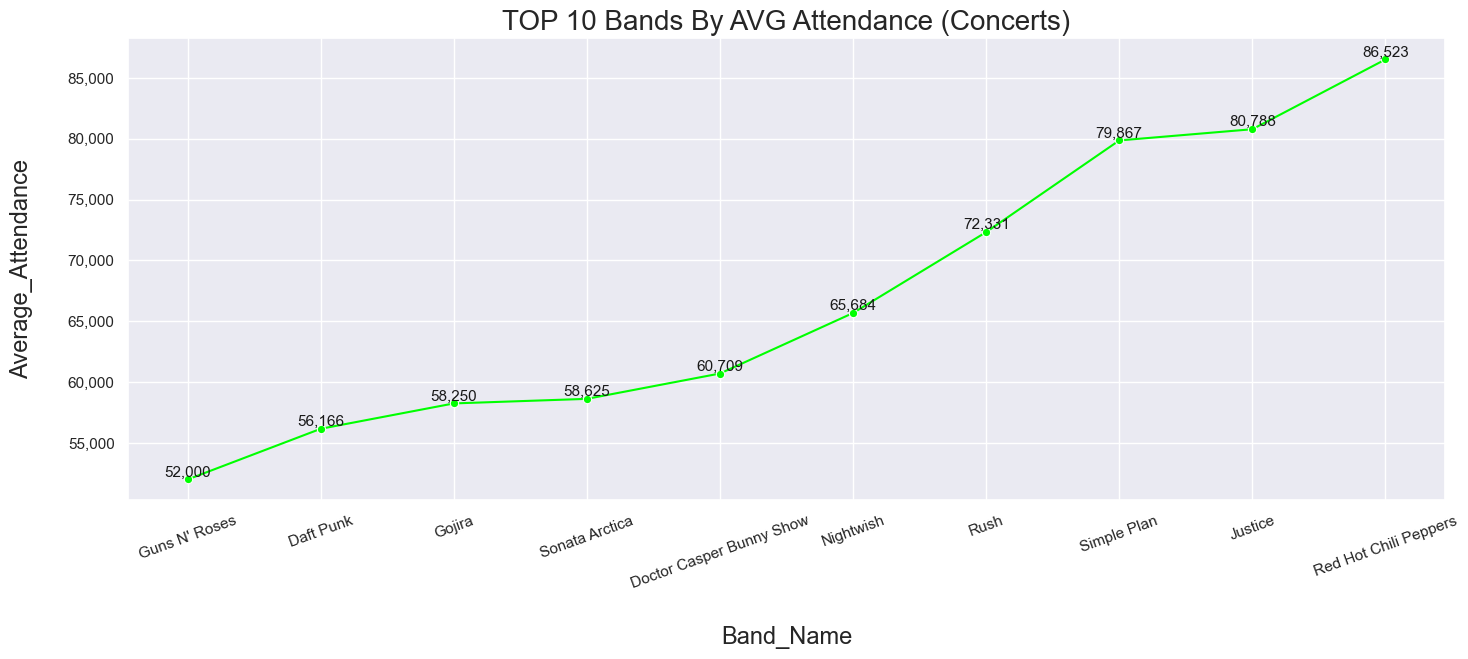

In [53]:
plt.figure(figsize=(17,6))

sb.lineplot(x='Band_Name', y='Average_Attendance', data=Attendance, marker='o', color='#00FF00')

plt.title("TOP 10 Bands By AVG Attendance (Concerts)", fontsize=20)
plt.xlabel('Band_Name', fontsize=17, labelpad=25)
plt.ylabel('Average_Attendance', fontsize=17, labelpad=25)


def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

for i, value in enumerate(Attendance['Average_Attendance']):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11, color= 'k')


plt.xticks(rotation=20)
plt.show()

### How many didn't go to the concerts

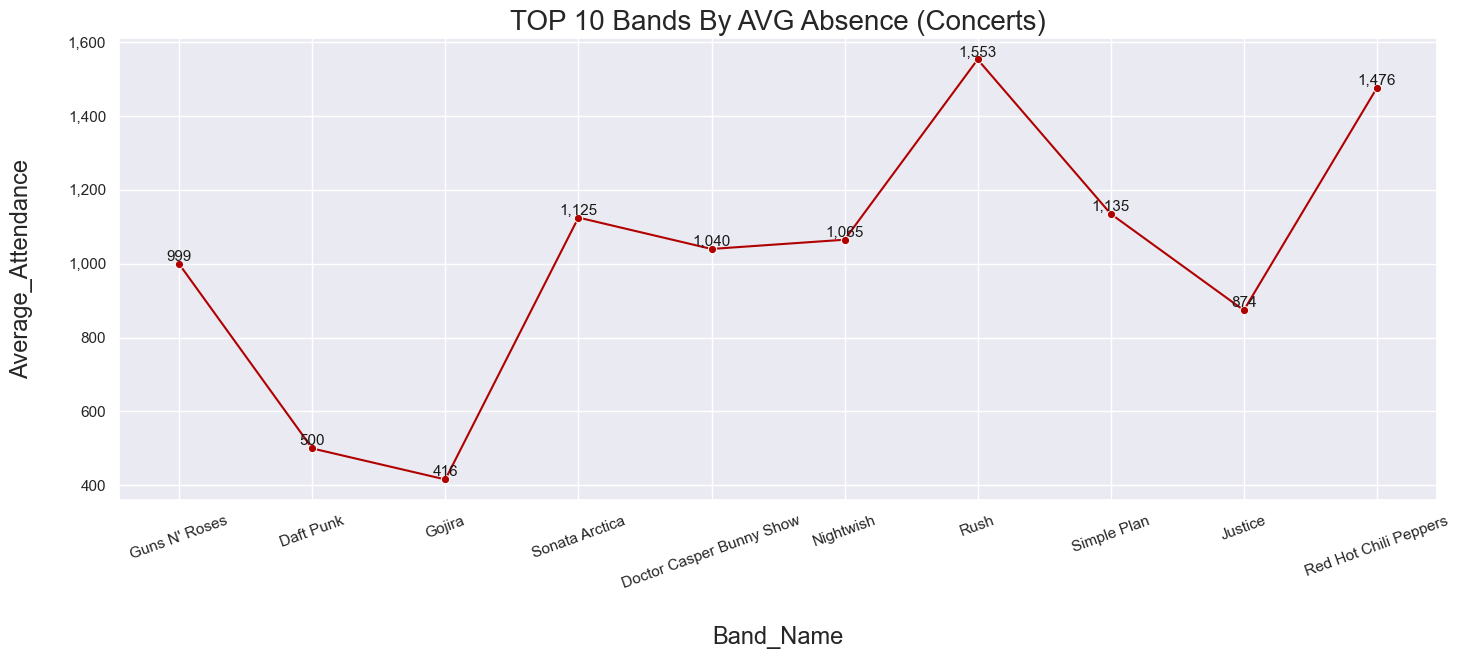

In [54]:
plt.figure(figsize=(17,6))

sb.lineplot(x='Band_Name', y='Average_Absence', data=Absence, marker='o', color='#B10000')

plt.title("TOP 10 Bands By AVG Absence (Concerts)", fontsize=20)
plt.xlabel('Band_Name', fontsize=17, labelpad=25)
plt.ylabel('Average_Attendance', fontsize=17, labelpad=25)


def comma_formatter(x, pos):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

for i, value in enumerate(Absence['Average_Absence']):
    plt.annotate(f'{int(value):,}', (i, value), ha='center', va='bottom', fontsize=11, color= 'k')


plt.xticks(rotation=20)
plt.show()

This graphs shows the Average Attendance/Absence of people at the concerts by each band

we can see that not all the people who bought a ticket actually went to the concert

Red Hot Chili Peppers Has The Highest Attendance But RUSH Band Has The Highest Absence (By Average)

---

#### VIEW 8

## How many concerts by day of the week

In [55]:
view8

,Day Of Week,ConcertCount
0,Friday,27
1,Tuesday,28
2,Wednesday,29
3,Saturday,31
4,Sunday,31
5,Thursday,31
6,Monday,35


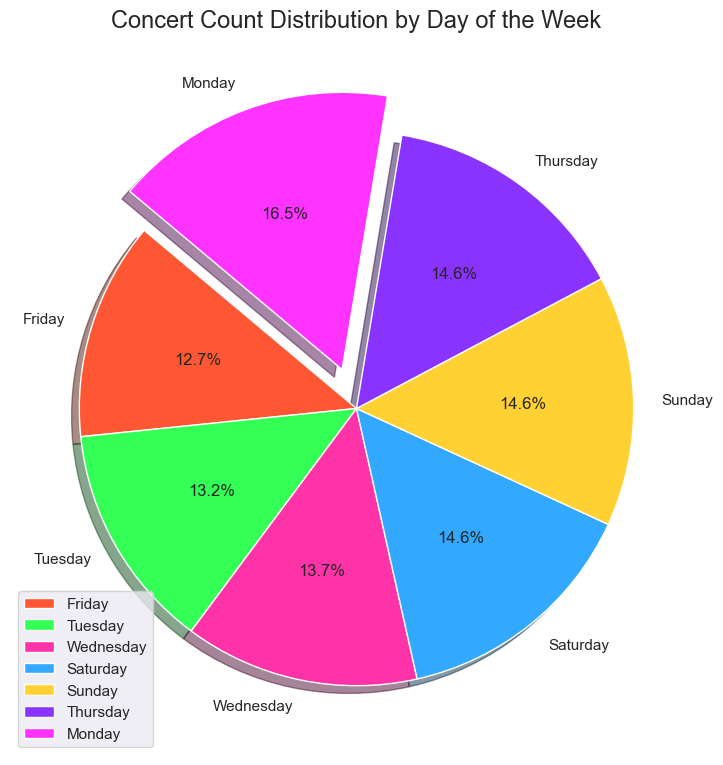

In [56]:
plt.figure(figsize=(10,9), dpi=100)

color = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF', '#FFD133', '#8A33FF', '#FF33FF']

plt.pie(view8['ConcertCount'], labels=view8['Day Of Week'], autopct='%1.1f%%', colors=color, explode=(0,0,0,0,0,0,0.15),shadow=True, startangle=140)


plt.title('Concert Count Distribution by Day of the Week', fontsize=17, pad=25)

plt.legend(loc='lower left')
plt.show()

### Most of the concerts took place on Monday
212 Concerts --> Monday:

    35 Concerts --> 16.5%

---

#### VIEW 9

## Top 5 Albums

Bands and their albums + copies sold

In [57]:
view9

,Band_Name,Album_Name,Copies_Sold
0,The Jimi Hendrix Experience,Are You Experienced,5000000
1,The Jimi Hendrix Experience,Electric Ladyland,2000000
2,The Jimi Hendrix Experience,Bold as Love,2000000
3,The Jimi Hendrix Experience,Axis: Bold as Love,1500000
4,Guns N' Roses,Chinese Democracy,3000000
...,...,...,...
193,Lacuna Coil,Delirium,200000
194,Lacuna Coil,Broken Crown Halo,200000
195,Maneskin,Chosen,800000
196,Maneskin,Teatro dira: Vol. I,1000000


#### I'm only interested in the TOP 5 Albums

In [58]:
view9 = view9.sort_values(by='Copies_Sold', ascending=True).tail(5)
view9

,Band_Name,Album_Name,Copies_Sold
39,The Eagles,Hotel California,32000000
113,The Beatles,Sgt. Peppers Lonely Hearts Club Band,32000000
80,Led Zeppelin,Led Zeppelin IV,37000000
95,Pink Floyd,The Dark Side of the Moon,45000000
47,AC/DC,Back in Black,50000000


C:\Users\Dor\AppData\Local\Temp\ipykernel_356\1810159917.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=view9, y='Band_Album', x='Copies_Sold', palette=colors)


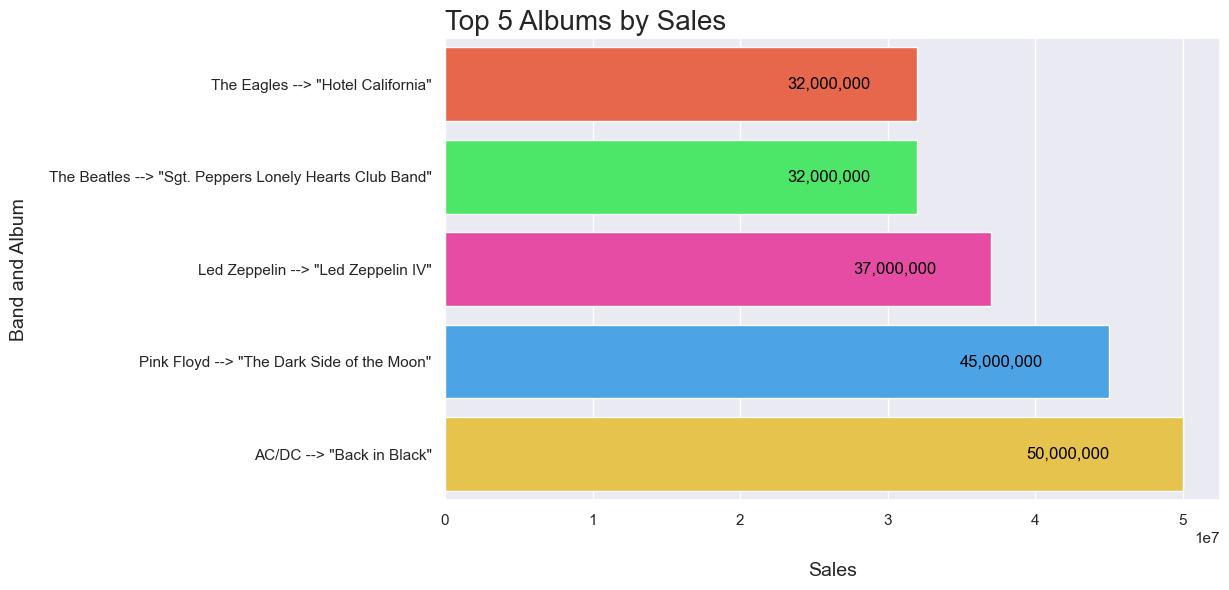

In [59]:
plt.figure(figsize=(10,6))


# Combine Band Name and Album Name for the y-axis
view9['Band_Album'] = view9['Band_Name'] + ' --> ' + '"' + view9['Album_Name'] + '"'

colors = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF', '#FFD133']

sb.barplot(data=view9, y='Band_Album', x='Copies_Sold', palette=colors)

plt.title('Top 5 Albums by Sales', fontsize=20, loc='left')
plt.xlabel('Sales', fontsize=14, labelpad=25, loc='center')
plt.ylabel('Band and Album', fontsize=14, labelpad=15)


# Add the sales numbers on the bars
for index, value in enumerate(view9['Copies_Sold']):
    plt.text(value - (value * 0.1), index, f'{value:,}', ha='right', va='center', fontsize=12, color='black')


plt.show()

### "Back in Black" Album by the band AC/DC is the most popular album With 50M Copies Sold

---

#### VIEW 10

## Concert Locations Profits

In [60]:
view10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location_Name  50 non-null     object
 1   Country        50 non-null     object
 2   Total_Revenue  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [61]:
view10.describe()

,Total_Revenue
count,5.000000e+01
mean,5.397712e+06
std,3.761928e+06
min,7.405400e+05
25%,2.750117e+06
50%,4.174497e+06
75%,7.806217e+06
max,1.707436e+07


### TOP 10 Locations By Profit

In [62]:
Top_10_Locations = view10.sort_values(by = 'Total_Revenue', ascending=True).tail(10)

Top_10_Locations

,Location_Name,Country,Total_Revenue
29,Kyocera Dome,JAPAN,8724946
13,Parc des Princes,FRANCE,9555734
11,Groupama Stadium,FRANCE,10150480
43,Wembley Stadium,UK,10918340
33,Tokyo Dome,JAPAN,11274126
36,Luzhniki Stadium,SPAIN,11355151
17,Olympiastadion,GERMANY,11459305
18,Veltins-Arena,GERMANY,13163865
35,La Cartuja Stadium,SPAIN,13568191
14,Stade de France,FRANCE,17074356


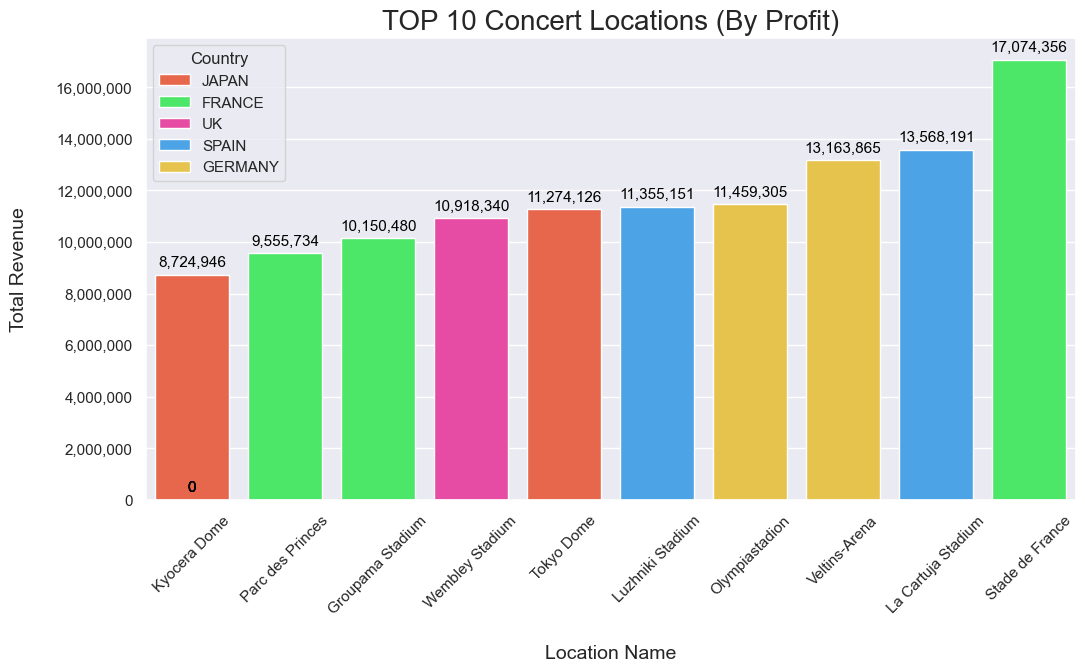

In [63]:
plt.figure(figsize=(12, 6))

colors = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF', '#FFD133']

sb.barplot(data=Top_10_Locations, x='Location_Name', y='Total_Revenue', hue='Country', palette=colors)

# Display the revenue numbers on y-axis with commas
def comma_formatter(x, pos):
    return f'{int(x):,}'

# Add commas to the numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11, color='black')

plt.title('TOP 10 Concert Locations (By Profit)', fontsize=20)
plt.xlabel('Location Name', fontsize=14, labelpad=20)
plt.ylabel('Total Revenue', fontsize=14, labelpad=20)
plt.xticks(rotation=45)

plt.show()

### Stade de France is the most profitable concert location (Average of 17M $)
Country --> France

---

### VIEW 11

## Locations Capacity

In [64]:
view11.head(10)

,Location_Name,Country,Capacity
0,Madison Square Garden,USA,20000
1,Tokyo Dome,JAPAN,55000
2,Rogers Centre,CANADA,49000
3,Wembley Stadium,UK,90000
4,Menora Mivtachim Arena,ISRAEL,10000
5,Hartwall Arena,FINLAND,15000
6,Mercedes-Benz Arena,GERMANY,17000
7,AccorHotels Arena,FRANCE,20000
8,Mediolanum Forum,ITALY,12700
9,Palau Sant Jordi,SPAIN,17500


### TOP 10 Locations By Capacity

In [65]:
view11 = view11.sort_values(by='Capacity', ascending=True).tail(10)
view11

,Location_Name,Country,Capacity
44,Volksparkstadion,GERMANY,57000
45,Groupama Stadium,FRANCE,59000
38,La Cartuja Stadium,SPAIN,60000
35,Veltins-Arena,GERMANY,62000
36,Orange Valodrome,FRANCE,67000
53,Olympiastadion_MU,GERMANY,69250
16,Olympiastadion,GERMANY,74475
47,Luzhniki Stadium,SPAIN,81000
17,Stade de France,FRANCE,81338
3,Wembley Stadium,UK,90000


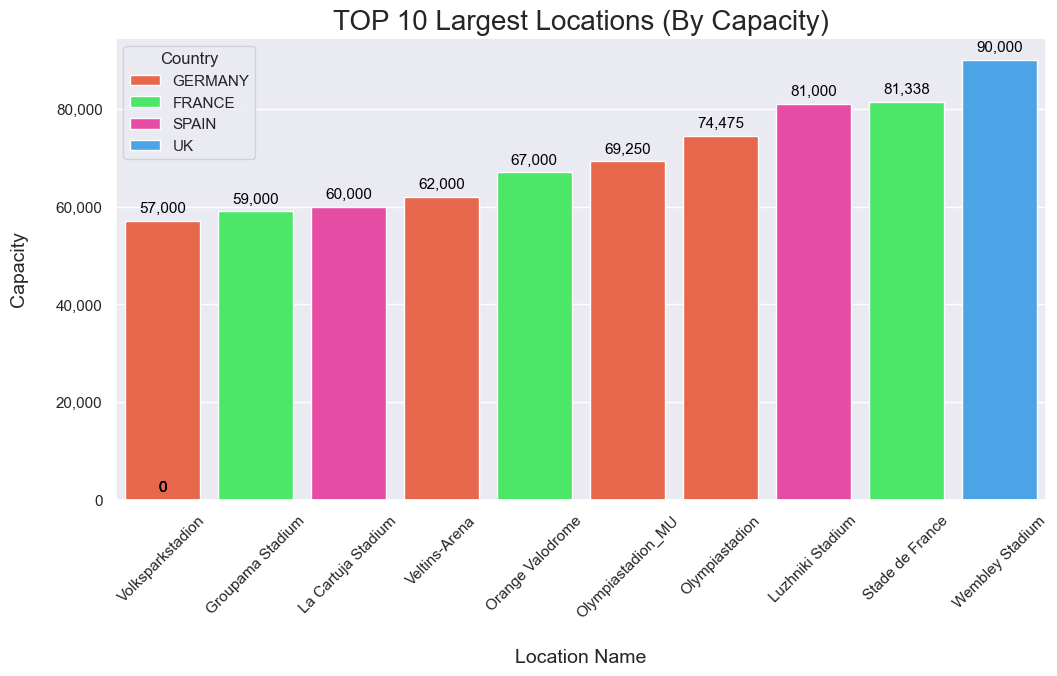

In [66]:
plt.figure(figsize=(12, 6),dpi=100)

colors = ['#FF5733', '#33FF57', '#FF33A8', '#33A8FF']

sb.barplot(data=view11, x='Location_Name', y='Capacity', hue='Country', palette=colors)

# Display the capacity numbers on y-axis with commas
def comma_formatter(x, pos):
    return f'{int(x):,}'

# Add commas to the numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Add the numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11, color='black')


plt.title('TOP 10 Largest Locations (By Capacity)', fontsize=20)
plt.xlabel('Location Name', fontsize=14, labelpad=20)
plt.ylabel('Capacity', fontsize=14, labelpad=20)
plt.xticks(rotation=45)


plt.show()

### The Largest Location For Concerts Is Wembley Stadium With 90K Seats